# Exploration of Issue Data from React Repository

In [55]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from classifier import *
from issues import *

## Issue Data Summary

In [56]:
with open('data/react/react_issues_closed.json') as f:
    closed_issues = json.load(f)
print(str(len(closed_issues)) + ' closed issues')
with open('data/react/react_issues_open.json') as f:
    open_issues = json.load(f)
print(str(len(open_issues)) + ' open issues')

5575 closed issues
379 open issues


In [57]:
get_issue_by_title(closed_issues, "Extract react prop from ref")

[{'url': 'https://api.github.com/repos/facebook/react/issues/12903',
  'repository_url': 'https://api.github.com/repos/facebook/react',
  'labels_url': 'https://api.github.com/repos/facebook/react/issues/12903/labels{/name}',
  'comments_url': 'https://api.github.com/repos/facebook/react/issues/12903/comments',
  'events_url': 'https://api.github.com/repos/facebook/react/issues/12903/events',
  'html_url': 'https://github.com/facebook/react/issues/12903',
  'id': 326290102,
  'number': 12903,
  'title': 'Extract react prop from ref',
  'user': {'login': 'gk159yo',
   'id': 18729755,
   'avatar_url': 'https://avatars3.githubusercontent.com/u/18729755?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/gk159yo',
   'html_url': 'https://github.com/gk159yo',
   'followers_url': 'https://api.github.com/users/gk159yo/followers',
   'following_url': 'https://api.github.com/users/gk159yo/following{/other_user}',
   'gists_url': 'https://api.github.com/users/gk159yo/gists{/gist_

### Issues that are classified as trivial or documentation changes are labeled 'True', all other issues are labeled as 'False'.

Text(0.5,1,'open issue labels')

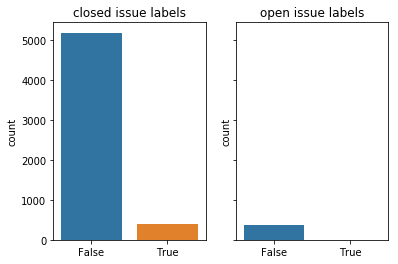

In [58]:
closed_labels = classify_issues(closed_issues)
open_labels = classify_issues(open_issues)

ig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(closed_labels, ax=ax1).set_title("closed issue labels")
sns.countplot(open_labels, ax=ax2).set_title("open issue labels")

In [59]:
pos_issues_closed = [issue for (i,issue) in enumerate(closed_issues) if closed_labels[i]]
neg_issues_closed = [issue for (i,issue) in enumerate(closed_issues) if not closed_labels[i]]
pos_issues_open = [issue for (i,issue) in enumerate(open_issues) if open_labels[i]]
neg_issues_open = [issue for (i,issue) in enumerate(open_issues) if not open_labels[i]]

## Exploration of Positive Labeled Issues

In [60]:
# Print a sample of positive label titles
print("positive label titles: ")
for issue in pos_issues_closed[:20]:
    print ("\t" + "\"" + issue['title'] + "\"")

positive label titles: 
	"fix docs rake "update_version" command to strip trailing spaces"
	"docs don't even mention reconciliation!"
	"better event docs"
	"few issues in the (upcoming) doc"
	"link to cdnjs in docs"
	"old jsfiddle links in docs"
	"generate docs using jsdoc (or something)."
	"react broken in safari 5.1.1"
	"support onmouseover"
	"docco-style documentation"
	"documentation - createclass and rendercomponent too vague, add more links"
	"get rid of sanitize dependency in docs"
	"docs nav header behaviour on different screen sizes"
	"update top level api docs for completeness."
	"add docs to "multiple components" page about how to communicate between parent and child"
	"[documentation] document usage of <select>"
	"better reactcsstransitiongroup docs"
	"better error display for docs live editor"
	"third party components section, also try to establish a standard."
	"tutorials docs section"


### The classifier misclassifies some examples as documentation/trivial issues that are more complex upon manual inspection. Example below is an issue that was flagged despite being a significant code change with a lot of discussion around it.

In [61]:
get_issue_by_title(pos_issues_closed, "null props considered differently in getdefaultprops vs. isrequired")

[{'url': 'https://api.github.com/repos/facebook/react/issues/2166',
  'repository_url': 'https://api.github.com/repos/facebook/react',
  'labels_url': 'https://api.github.com/repos/facebook/react/issues/2166/labels{/name}',
  'comments_url': 'https://api.github.com/repos/facebook/react/issues/2166/comments',
  'events_url': 'https://api.github.com/repos/facebook/react/issues/2166/events',
  'html_url': 'https://github.com/facebook/react/issues/2166',
  'id': 42285693,
  'number': 2166,
  'title': 'null props considered differently in getdefaultprops vs. isrequired',
  'user': {'login': 'jeanlauliac',
   'id': 1733570,
   'avatar_url': 'https://avatars3.githubusercontent.com/u/1733570?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/jeanlauliac',
   'html_url': 'https://github.com/jeanlauliac',
   'followers_url': 'https://api.github.com/users/jeanlauliac/followers',
   'following_url': 'https://api.github.com/users/jeanlauliac/following{/other_user}',
   'gists_url':

## Exploration of Negative Labeled Issues

In [62]:
print("negative label titles: ")
for issue in neg_issues_closed[:20]:
    print ("\t" + "\"" + issue['title'] + "\"")

negative label titles: 
	"can't require() react-tools module"
	"write tests for react-tools module"
	"must adding comments for jsx?"
	"small update to bower command"
	"make valid npm release"
	"react in requirejs ?"
	"is es5-sham required for ie8?"
	"uncaught syntaxerror: unexpected token < "
	"work with compile-to-js languages (like coffeescript)"
	"the name "jsx" is already taken, use "xjs" instead?"
	"jsx not able to watch subdirs"
	"jsx page gives 404 - linked from "why react" blog post"
	"jsx whitespace coalescing should work like regular html"
	"automatically bind scope of all user provided methods."
	"jsx offline transform exits with error code 1 on any change (ubuntu 12.10)"
	"allow namespacing in component names in jsx"
	"ordering of componentdidmount events"
	"preserve line numbers in "grunt test""
	"grunt test just hangs"
	"bin/jsx should not relativize required module ids unless --relativize is passed"


### The classifier misses some examples that upon further inspection are clearly simple changes. Example below is an issue that was resolved by simply changing a single URL in a markdown file.

In [63]:
misclass_issue = get_issue_by_title(neg_issues_closed, 'jsx page gives 404 - linked from "why react" blog post')
print('title: ' + misclass_issue[0]['title'])
print('body: ' + misclass_issue[0]['body'])

title: jsx page gives 404 - linked from "why react" blog post
body: the following url is not found - http://facebook.github.io/react/blog/2013/06/05/facebook.github.io/react/docs/syntax.htmland it is linked from - http://facebook.github.io/react/blog/2013/06/05/why-react.html


## Comparsion of Issue Classes

In [64]:
#TODO: show most frequent words in each class. Figure out correct method for removing 'filler' words first

In [65]:
#TODO: compare average, median, etc. amount of code in each class of issue. Can be found by length of strings within ''' '''

In [66]:
#TODO: compare average, median, etc. lengths of issues bodies for each class.

In [67]:
#TODO: average, median, etc. number of comments on issues for each class

In [68]:
#TODO: other statistics that may be meaningful?????